#Mount drive

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')
 
# #Unmount drive
# from google.colab import drive
# drive.flush_and_unmount()

In [ ]:
# Install the necessary modules 
!pip install nilearn
# !pip install "scikit-learn==0.22.1"
# !pip install "scipy==1.1.0"
# !pip install "numpy==1.15.1"
# !pip install tensorboardX
# !pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.4.0.html
# !pip install "torch==1.4"

# Useful packages for the project

In [ ]:
# import necessary packages
import nibabel as nib
import pandas as pd
import glob
from nilearn import plotting
from nilearn.image import mean_img
import nibabel as nib
import torch 
import torch.nn.functional as F
import torch.nn as nn
import torchvision
from sklearn import preprocessing
import torchvision.transforms as transforms
import torch.utils.data as data_utils
import csv
import numpy as np #for numeric computations
import seaborn as sb #high level visualization
import matplotlib.pyplot as plt # for visualization
from IPython.display import display_html #to display in html formats

In [ ]:
# #create folder for hcp dataset and download it
# !mkdir '/content/drive/My Drive/Project_final/brain_/data/hcp' 
# !wget http://cogspaces.github.io/assets/data/hcp_mask.nii.gz 
# !cp '/content/hcp_mask.nii.gz' '/content/drive/My Drive/Project_final/brain_/data/hcp'

In [ ]:
# # get dataset: archi, brainomics, hcp, camcan, la5c
# !python '/content/drive/My Drive/Project_final/brain_/data/get_data.py' hcp --fetch #
# !cp -r '/content/data/neurovault/' '/content/drive/My Drive/Project_final/brain_/data/neurovault/'

#Get Data

In [ ]:
# Get data from following command line. After execution, it will create a folder data/neurovault inside the content of the drive
# myfile = glob.glob('/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4341/*.nii.gz')
# from pandas import DataFrame
# df = DataFrame (myfile,columns=['zmap', 'study', 'subject', 'task', 'contrast'])
df = pd.read_csv('/content/drive/My Drive/Project_final/brain_/data/neurovault/dataframe.csv')

In [ ]:
df.head()

,Unnamed: 0,z_map,study,subject,task,contrast
0,0,/content/drive/My Drive/Project_final/brain_/d...,archi,14,parietal,object_grasp
1,1,/content/drive/My Drive/Project_final/brain_/d...,archi,48,localizer,damier_V
2,2,/content/drive/My Drive/Project_final/brain_/d...,archi,73,localizer,damier_H
3,3,/content/drive/My Drive/Project_final/brain_/d...,archi,75,localizer,motor-cognitive
4,4,/content/drive/My Drive/Project_final/brain_/d...,archi,24,localizer,clicGvideo


In [ ]:
# get number of class per study
df['Contrast_task'] = df['contrast'] + ' ' + df['task']
study = set(list(df['study']))
l = []
for st in study:
  new_df = df.loc[df['study'] == st]
  l.append(len(set(list(new_df['Contrast_task']))))
labels = dict(zip(list(study), l))
labels

{'archi': 30, 'brainomics': 19, 'camcan': 5, 'hcp': 23, 'la5c': 25}

In [ ]:
# Generat dataframe.csv file corresponding to the downloaded dataset
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos[0]

# myfile = glob.glob('/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4341/*.nii.gz')
# l = []
# for i in df['z_map']:
#   if i not in myfile:
#      liste = list(getIndexes(df, i))
#      if df.loc[liste[0]]['study'] == ' #nv_ids':
#         df = df.drop([liste[0]])

In [ ]:
# # stats_df = get_statistics(df)
# stats_df.to_pickle("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp_stat/hcp.pkl")
# stats_df.to_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp_stat/hcp.csv")
# df = resample_all(df)
# df.to_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp/resampled_dataframe.csv")

# df = pd.read_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp/resampled_dataframe.csv")
# #Download hcp dataset
# !python '/content/drive/My Drive/Project_final/brain_/data/download_hcp.py' '/content/drive/My Drive/Project_final/brain_/data/hcp'
# !mkdir '/content/drive/My Drive/Project_final/brain_/data/output'
# !python '/content/drive/My Drive/Project_final/brain_/data/parcellations.py' 256 -d/'content/drive/My Drive/Project_final/brain_/data/hcp' -o/'/content/drive/My Drive/Project_final/brain_/data/output'

# Data vizualisation and preprocessing


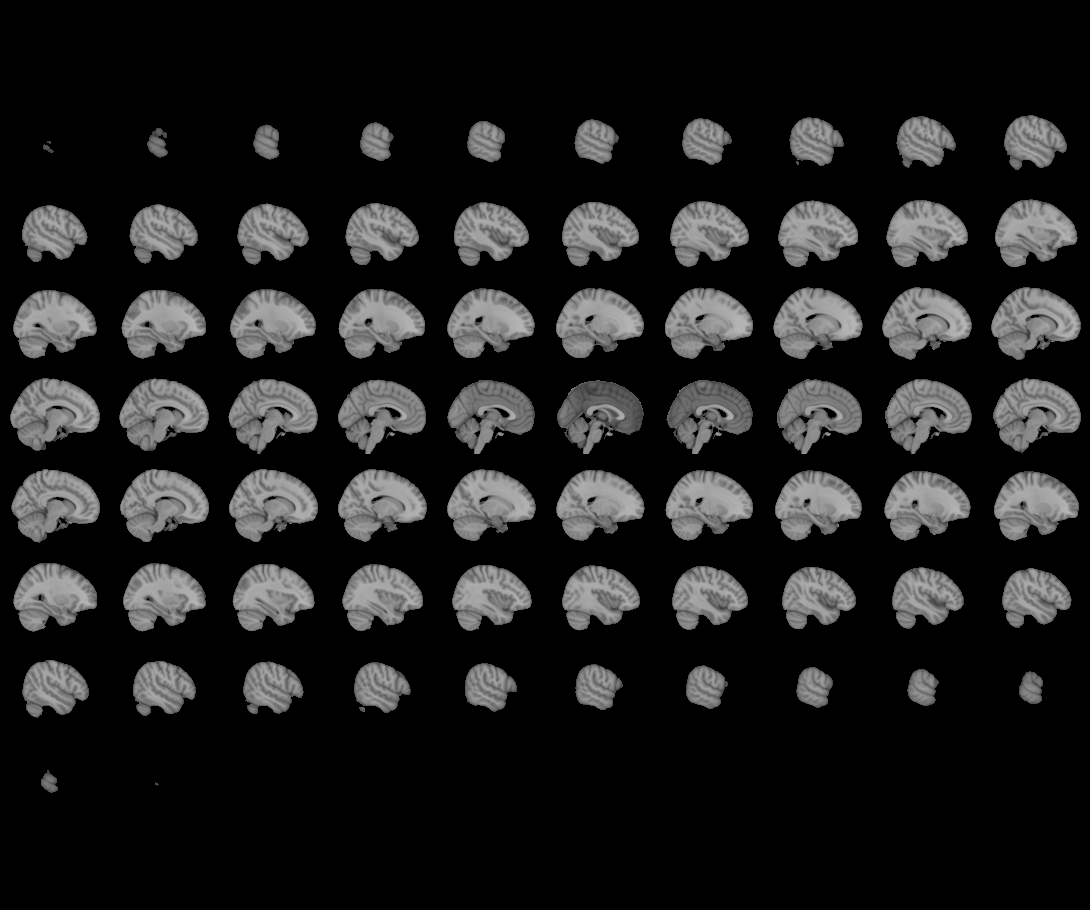
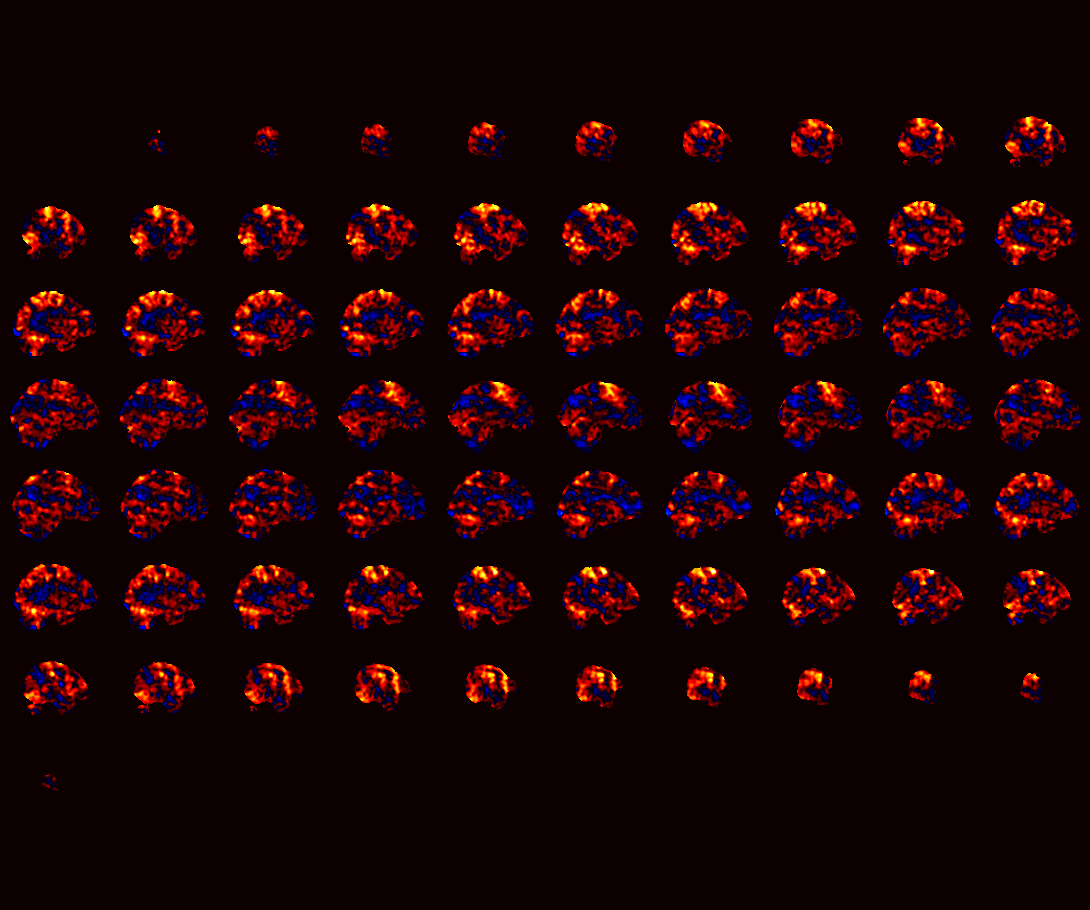

In [ ]:
# vizualization of an fMRI image

df = pd.read_csv('/content/drive/My Drive/Project_final/brain_/data/neurovault/dataframe.csv')
data = df['z_map']
image = data[0]
plotting.view_img(mean_img(image), threshold=None)

In [ ]:
# # create dataframe.csv file for a given dataset
# df = pd.read_csv('/content/drive/My Drive/Project_final/brain_/data/neurovault/dataframe.csv')
# myfile = glob.glob('/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4337/*.nii.gz')

# for i in df['study']:
#   if i != 'hcp':
#     liste = list(getIndexes(df, i))
#     df = df.drop([liste[0]])

# df.to_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4337/dataframe.csv")

In [ ]:
#Check if the length of created dataframe.csv correspond exaclty to the given dataset
df1 = pd.read_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4337/dataframe.csv")
print(len(df1), len(myfile),df1['z_map'][0])


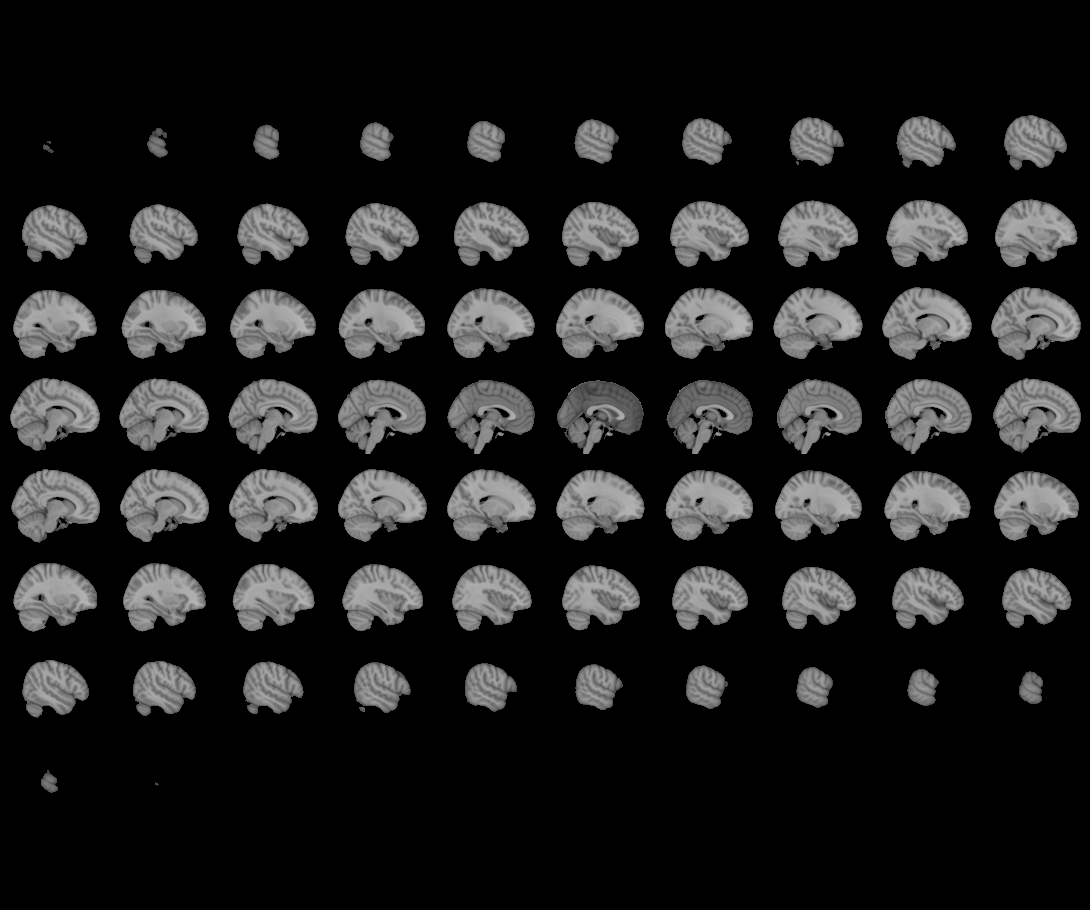
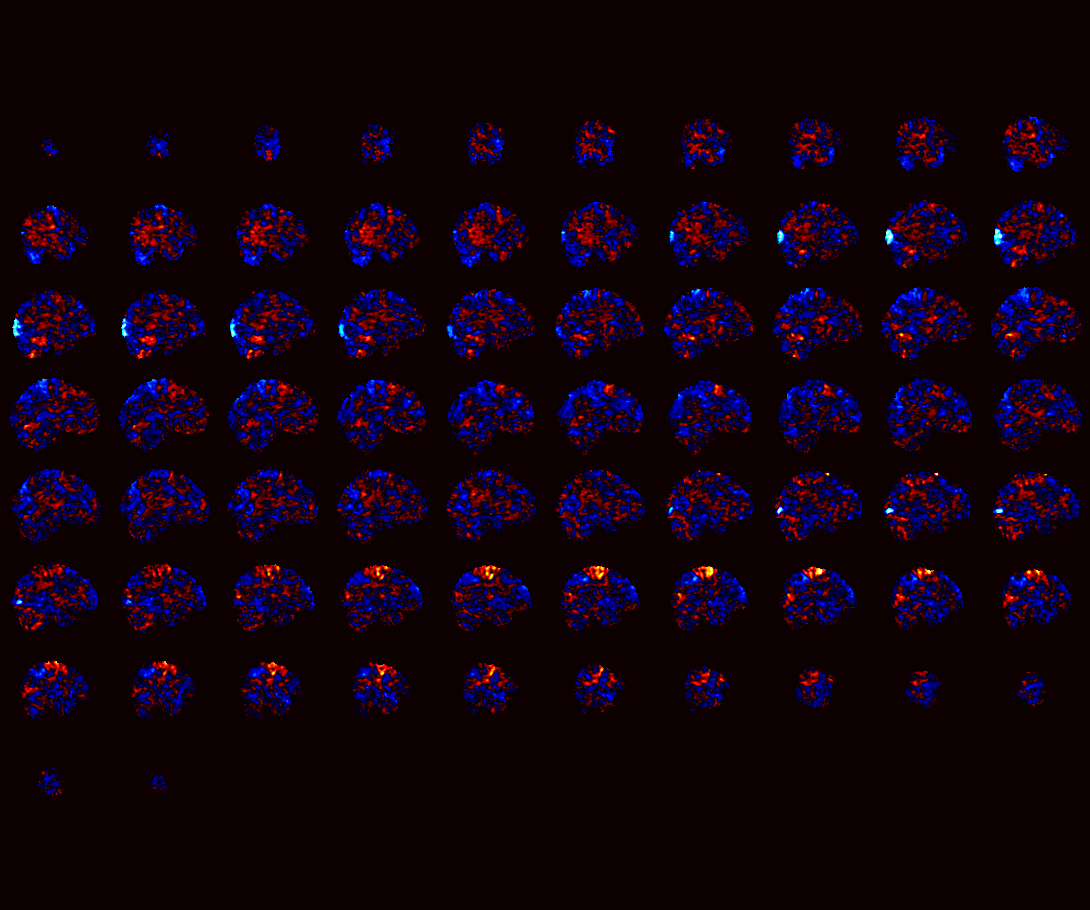

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4337/dataframe.csv')
data = df['z_map']
image = data[0]
# print(mean_img(image).shape)
plotting.view_img(mean_img(image), threshold=None)

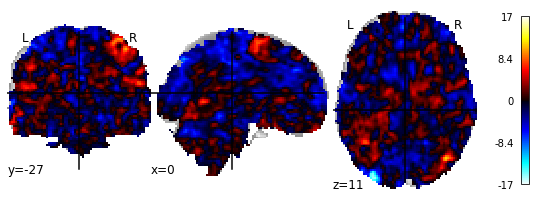

In [ ]:
fig = plotting.plot_stat_map(mean_img(image), black_bg=False,)
# fig.savefig('Stat_map_la5c.png') 

# Some processing

In [ ]:
#After downloading all datasets, just replace each corresponding number to load a dataset
'''
'archi': 4339,

'hcp': 4337,

'brainomics': 4341,

'camcan': 4342,

'la5c': 4343,
'''
DataFrame = pd.read_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4341/dataframe.csv")
#Delete Unnamed column in the created dataframe.csv
DataFrame = DataFrame.loc[:, ~DataFrame.columns.str.contains('^Unnamed')]
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   z_map     1785 non-null   object
 1   study     1785 non-null   object
 2   subject   1785 non-null   int64 
 3   task      1785 non-null   object
 4   contrast  1785 non-null   object
dtypes: int64(1), object(4)
memory usage: 69.9+ KB


In [ ]:
# Drop unecessary columns
DataFrame.drop(['study'], axis='columns', inplace=True)
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   z_map     1785 non-null   object
 1   subject   1785 non-null   int64 
 2   task      1785 non-null   object
 3   contrast  1785 non-null   object
dtypes: int64(1), object(3)
memory usage: 55.9+ KB


In [ ]:
#Combination of the Contrast and Task that gives the labels
DataFrame['Contrast_task'] = DataFrame['task'] + ' ' +   DataFrame['contrast']

In [ ]:
DataFrame.head()

,z_map,subject,task,contrast,Contrast_task
0,/content/drive/My Drive/Project_final/brain_/d...,10,localizer,left_auditory&visual_click,localizer left_auditory&visual_click
1,/content/drive/My Drive/Project_final/brain_/d...,29,localizer,checkerboard,localizer checkerboard
2,/content/drive/My Drive/Project_final/brain_/d...,57,localizer,left_visual_click,localizer left_visual_click
3,/content/drive/My Drive/Project_final/brain_/d...,66,localizer,visual_sentences,localizer visual_sentences
4,/content/drive/My Drive/Project_final/brain_/d...,76,localizer,horizontal_checkerboard,localizer horizontal_checkerboard


In [ ]:
# split dataframe into train and test
DataFrame_copy = DataFrame.copy()
train_set = DataFrame_copy.sample(frac=0.75, random_state=42)
test_set = DataFrame_copy.drop(train_set.index)

print ('Training set')
print (train_set)
print ('\nTest set')
print (test_set)

Training set
                                                  z_map  ...                          Contrast_task
1374  /content/drive/My Drive/Project_final/brain_/d...  ...  localizer auditory&visual_calculation
1080  /content/drive/My Drive/Project_final/brain_/d...  ...          localizer auditory_processing
1519  /content/drive/My Drive/Project_final/brain_/d...  ...                 localizer checkerboard
289   /content/drive/My Drive/Project_final/brain_/d...  ...          localizer left_auditory_click
990   /content/drive/My Drive/Project_final/brain_/d...  ...            localizer visual_processing
...                                                 ...  ...                                    ...
1219  /content/drive/My Drive/Project_final/brain_/d...  ...  localizer right_auditory&visual_click
1784  /content/drive/My Drive/Project_final/brain_/d...  ...          localizer effects_of_interest
4     /content/drive/My Drive/Project_final/brain_/d...  ...      localizer horizontal_

In [ ]:
#z_map correspond to each image that we want to feed inside a deep learning model and Task correspond to the labels we want to predict 
X_train = train_set.pop('z_map')
label_train = train_set.pop('Contrast_task')
X_test = test_set.pop('z_map')
label_test = test_set.pop('Contrast_task')

In [ ]:
DataFrame.head()

,z_map,subject,task,contrast,Contrast_task
0,/content/drive/My Drive/Project_final/brain_/d...,10,localizer,left_auditory&visual_click,localizer left_auditory&visual_click
1,/content/drive/My Drive/Project_final/brain_/d...,29,localizer,checkerboard,localizer checkerboard
2,/content/drive/My Drive/Project_final/brain_/d...,57,localizer,left_visual_click,localizer left_visual_click
3,/content/drive/My Drive/Project_final/brain_/d...,66,localizer,visual_sentences,localizer visual_sentences
4,/content/drive/My Drive/Project_final/brain_/d...,76,localizer,horizontal_checkerboard,localizer horizontal_checkerboard


# Visualization of the Dataframe

In [ ]:
# function to display the dataframe
def show_df(data, cat, col):
    avg_df = data.groupby(cat, as_index=False)[col].mean().sort_values(by = col, ascending = False)
    # check for NA
    avg_df = avg_df.dropna(axis = 0)
    # display top 10
    df1 = avg_df.head(10)
    html_str=''
    for df in [df1]:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True) 

In [ ]:
def cat_plot(df, cat, col,color1):
    avg = df.groupby(cat, as_index = False)[col].mean()
    avg.set_index(cat, inplace = True)
    best = avg.nlargest(10, col)
    # Reverse so the plot looks nicer; the "best" will be on top
    best = best.iloc[::-1]
    best.plot(kind = "barh", color=color1,fontsize = 14, title = "Number" + cat + " by " + col,legend=False)
    plt.show()

In [ ]:
show_df(DataFrame,'Contrast_task','subject')

,Contrast_task,subject
12,RELATIONAL REL,362027.692308
13,SOCIAL RANDOM,362027.692308
9,MOTOR RF,360791.490566
15,WM 0BK_BODY,357909.890909
11,RELATIONAL MATCH,357850.800000
8,MOTOR LH,357819.629630
6,MOTOR CUE,355882.169811
4,LANGUAGE MATH,354870.490566
20,WM 2BK_FACE,354462.075472
14,SOCIAL TOM,353699.777778


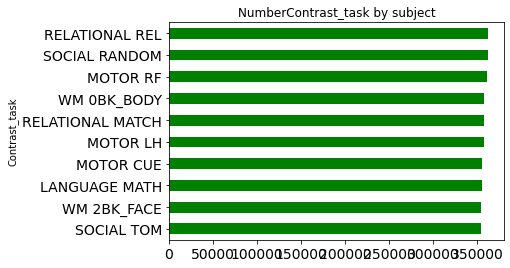

In [ ]:
cat_plot(DataFrame,'Contrast_task','subject','green')

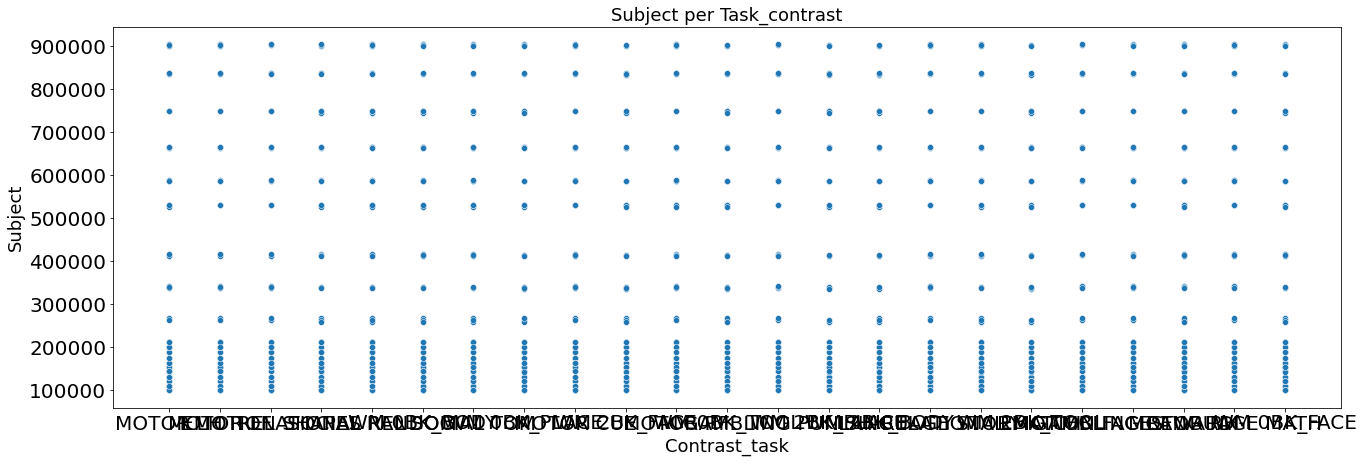

In [ ]:
fig, ax = plt.subplots(figsize=(22,7))
sb.scatterplot(y='subject', x='Contrast_task', data=DataFrame)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Subject per Task_contrast', size=18) 
ax.set_xlabel('Contrast_task', fontsize = 18) # Y label
ax.set_ylabel('Subject', fontsize = 18) # X label
plt.show()

# Preprocessing on the dataframe

In [ ]:
#convert categorical value of the label to numerical value. Here we used LabelEncoder but there is many ways to do this.
#Preprocessing using label encoder
le = preprocessing.LabelEncoder()
label = DataFrame_copy.pop('Contrast_task')
le.fit(label)
list(le.classes_)
num_classes = len(list(le.classes_))

In [ ]:
#convert categorical value to numerical value using label Encoder
y_train_list =  list(label_train)
y_test_list = list(label_test)
New_y_train = le.transform(y_train_list)
New_y_test = le.transform(y_test_list)

In [ ]:
# create dataframe
def convert_to_dataframe(list1, list2):
    Dict_dataset = {'images': list1, 'labels':list2}
    df1 = pd.DataFrame(Dict_dataset, columns = ['images', 'labels'])
    return df1

In [ ]:
#Label Encoder
train_dataframe = convert_to_dataframe(X_train, New_y_train )
test_dataframe = convert_to_dataframe(X_test, New_y_test)

In [ ]:
# DUE TO COMPUTATIONAL LIMITATION WE ARE FORCED TO SLICE THE DATAFRAME AND JUST TAKE A PORTION
torch.manual_seed(0)
dframe_train = train_dataframe.sample(n=825, random_state=42)
dframe_test = test_dataframe.sample(n=275, random_state=42)

In [ ]:
list_images_train = list(dframe_train['images'])
list_images_test = list(dframe_test['images'])

# Create dataloader

In [ ]:
def load_image(list_of_images_path):
  IMAGES = []
  for element in list_of_images_path:
    img = nib.load(element)
    data = img.get_fdata()
    IMAGES.append(data)
  return IMAGES

def convert_list_to_dataframe(list1):
    Dict_dataset = {'Images': list1, }
    df1 = pd.DataFrame(Dict_dataset, columns = ['Images'])
    return df1

IMAGES_train = load_image(list_images_train)
IMAGES_test = load_image(list_images_test)

dataframe_images_train = convert_list_to_dataframe(IMAGES_train) 
dataframe_images_test = convert_list_to_dataframe(IMAGES_test) 

dframe_train = dframe_train.reset_index(drop=True)
dframe_test = dframe_test.reset_index(drop=True)

result_train = pd.concat([dataframe_images_train, dframe_train], axis=1)
result_test = pd.concat([dataframe_images_test, dframe_test], axis=1)

result_train =  result_train.drop(['images'], axis=1)
result_test =  result_test.drop(['images'], axis=1)

In [ ]:
Liste_train = list(result_train['Images'].values)
Liste_test = list(result_test['Images'].values)

ARRAY_train = np.array(Liste_train, dtype = np.float32)
ARRAY_test = np.array(Liste_test, dtype = np.float32)

Images_torch_train = torch.from_numpy(ARRAY_train)
Images_torch_test = torch.from_numpy(ARRAY_test)

train_label = torch.tensor(result_train['labels'].values)
train_tensor = data_utils.TensorDataset(Images_torch_train, train_label) 
test_label = torch.tensor(result_test['labels'].values)
test_tensor = data_utils.TensorDataset(Images_torch_test, test_label) 

#creata dataloader using torch
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 32, shuffle = True)
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = 32, shuffle = False)

In [ ]:
# delete some variables to free memory
del (DataFrame, train_set, test_set, X_train, label_train, X_test, label_test, y_train_list, y_test_list, New_y_train, New_y_test, train_dataframe, test_dataframe, dframe_train, list_images_train, IMAGES_train, dataframe_images_train, result_train, Liste_train, ARRAY_train, train_label , train_tensor, dframe_test, list_images_test, IMAGES_test, dataframe_images_test, result_test, Liste_test, ARRAY_test, test_label , test_tensor)

In [ ]:
!free -h
# !nvidia-smi -L
# !nvidia-smi
# !nvcc --version
# !lscpu |grep 'Model name'
# !lscpu |grep 'Core(s) per socket:'
# !lscpu |grep 'Thread(s) per core:'

              total        used        free      shared  buff/cache   available
Mem:            12G        2.6G        7.7G        964K        2.4G         11G
Swap:            0B          0B          0B


# Model

In [ ]:
# Convolutional Neural Network
class Simple_ConvNet(nn.Module):
    def __init__(self, num_classes = num_classes):
      super(Simple_ConvNet, self).__init__()
      
      self.layer1 = nn.Sequential(
          nn.Conv2d(53, 110, kernel_size=5, stride=1, padding=2), #change the input channel from 91 to  53 when using Camcan and brainomics datasets
          nn.BatchNorm2d(110),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2), nn.Dropout(0.9))
      
      self.layer2 = nn.Sequential(
          nn.Conv2d(110, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2), nn.Dropout(0.9) )
      
      self.layer3 = nn.Sequential(
          nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer4 = nn.Sequential(
          nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer5 = nn.Sequential(
          nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      #comment the following layer when using Cam-CAN and brainomics datasets
      self.layer6 = nn.Sequential(
          nn.Conv2d(256, 256, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2), nn.Dropout(0.9)) 
      
      self.fc = nn.Linear(256, num_classes)
        
    def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = self.layer3(out)
      out = self.layer4(out)
      out = self.layer5(out)
      #comment the following layer when using Cam-CAN and brainomics datasets
      out = self.layer6(out)

      out = out.reshape(out.size(0), -1)
      out = self.fc(out)
      return out

# Train and test

In [ ]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Simple_ConvNet model
model = Simple_ConvNet(num_classes = num_classes).to(device)

In [ ]:
num_classes

23

In [ ]:
model.share_memory()

Simple_ConvNet(
  (layer1): Sequential(
    (0): Conv2d(91, 110, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.9, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(110, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.9, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential

In [ ]:
def accuracy(output, target, topk=(1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [ ]:
#checck shape of each image
for image, label in train_loader:
  print(image.shape)
  break

# TRY 

In [ ]:
#Loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr= 0.002, weight_decay=1e-3) # 0.0018000000000000004

# Training for Simple_Net
num_epochs = 100
top_1_train = []
top_1_test = []
# loop over the dataset multiple times
total_step = len(train_loader)
for epoch in range(num_epochs):
  print('Epoch: {}'.format(epoch + 1))
  
  # train for 1 epoch on the train set
  correct = 0
  for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)

      labels = labels.to(device)
      
      # zero the parameter gradients
      optimizer.zero_grad()

      # forward 
      outputs = model(images)
      loss = criterion(outputs, labels)
      
      # backward
      loss.backward()

      # gradient step 
      optimizer.step()
      
      # compute accuracy 
      correct += accuracy(outputs, labels)[0].item() / 100
      if (i+1) % 5 == 0:
          print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

  top_1t = correct / len(train_loader) * 100
  top_1_train.append(top_1t)
  print('Train Accuracy of the model: {} %'.format(top_1t)) 

          
  # evaluate on the test set  
  with torch.no_grad():
      correct = 0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
      
        # forward 
        outputs = model(images)
        valid_loss = criterion(outputs, labels)

        # compute accuracy 
        correct += accuracy(outputs, labels)[0].item() / 100
  
  top_1 = correct / len(test_loader) * 100
  top_1_test.append(top_1)
  print('Test Accuracy of the model: {} %'.format(top_1))


Epoch: 1
Epoch [1/100], Step [5/26], Loss: 4.3555
Epoch [1/100], Step [10/26], Loss: 4.1916
Epoch [1/100], Step [15/26], Loss: 3.9835
Epoch [1/100], Step [20/26], Loss: 3.7319
Epoch [1/100], Step [25/26], Loss: 3.6282
Train Accuracy of the model: 3.6730769230769225 %
Test Accuracy of the model: 4.166666666666666 %
Epoch: 2
Epoch [2/100], Step [5/26], Loss: 3.8773
Epoch [2/100], Step [10/26], Loss: 3.3867
Epoch [2/100], Step [15/26], Loss: 3.6712
Epoch [2/100], Step [20/26], Loss: 3.2774
Epoch [2/100], Step [25/26], Loss: 3.7762
Train Accuracy of the model: 8.360576923076923 %
Test Accuracy of the model: 6.140350871615939 %
Epoch: 3
Epoch [3/100], Step [5/26], Loss: 3.1904
Epoch [3/100], Step [10/26], Loss: 3.2061
Epoch [3/100], Step [15/26], Loss: 3.1006
Epoch [3/100], Step [20/26], Loss: 3.1066
Epoch [3/100], Step [25/26], Loss: 3.1893
Train Accuracy of the model: 7.605769230769231 %
Test Accuracy of the model: 7.5292397605048285 %
Epoch: 4
Epoch [4/100], Step [5/26], Loss: 3.0964
Epo

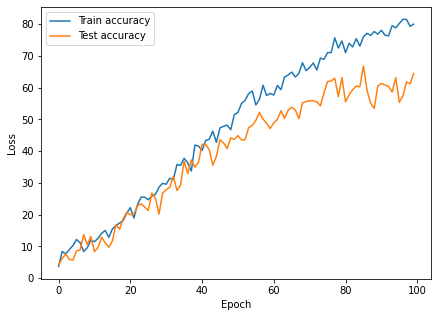

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(top_1_train, label='Train accuracy')
plt.plot(top_1_test, label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# del model
# model = Simple_ConvNet(num_classes = num_classes).to(device)

In [ ]:
#Loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr= 0.002, weight_decay=1e-2) # 0.0018000000000000004

# Training for Simple_Net
num_epochs = 100
top_1_train = []
top_1_test = []
# loop over the dataset multiple times
total_step = len(train_loader)
for epoch in range(num_epochs):
  print('Epoch: {}'.format(epoch + 1))
  
  # train for 1 epoch on the train set
  correct = 0
  for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)

      labels = labels.to(device)
      
      # zero the parameter gradients
      optimizer.zero_grad()

      # forward 
      outputs = model(images)
      loss = criterion(outputs, labels)
      
      # backward
      loss.backward()

      # gradient step 
      optimizer.step()
      
      # compute accuracy 
      correct += accuracy(outputs, labels)[0].item() / 100
      if (i+1) % 5 == 0:
          print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

  top_1t = correct / len(train_loader) * 100
  top_1_train.append(top_1t)
  print('Train Accuracy of the model: {} %'.format(top_1t)) 

          
  # evaluate on the test set  
  with torch.no_grad():
      correct = 0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
      
        # forward 
        outputs = model(images)
        valid_loss = criterion(outputs, labels)

        # compute accuracy 
        correct += accuracy(outputs, labels)[0].item() / 100
  
  top_1 = correct / len(test_loader) * 100
  top_1_test.append(top_1)
  print('Test Accuracy of the model: {} %'.format(top_1))


Epoch: 1
Epoch [1/100], Step [5/26], Loss: 4.5938
Epoch [1/100], Step [10/26], Loss: 3.9027
Epoch [1/100], Step [15/26], Loss: 3.8704
Epoch [1/100], Step [20/26], Loss: 3.6850
Epoch [1/100], Step [25/26], Loss: 3.5183
Train Accuracy of the model: 4.634615384615385 %
Test Accuracy of the model: 5.336257298787435 %
Epoch: 2
Epoch [2/100], Step [5/26], Loss: 3.3307
Epoch [2/100], Step [10/26], Loss: 3.2885
Epoch [2/100], Step [15/26], Loss: 3.0697
Epoch [2/100], Step [20/26], Loss: 3.2949
Epoch [2/100], Step [25/26], Loss: 3.2625
Train Accuracy of the model: 7.158653846153847 %
Test Accuracy of the model: 6.725146187676325 %
Epoch: 3
Epoch [3/100], Step [5/26], Loss: 3.1981
Epoch [3/100], Step [10/26], Loss: 3.2154
Epoch [3/100], Step [15/26], Loss: 3.2823
Epoch [3/100], Step [20/26], Loss: 3.0959
Epoch [3/100], Step [25/26], Loss: 3.0337
Train Accuracy of the model: 5.682692307692308 %
Test Accuracy of the model: 8.570906427171494 %
Epoch: 4
Epoch [4/100], Step [5/26], Loss: 3.1352
Epoch

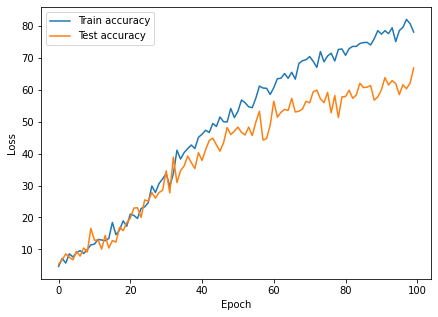

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(top_1_train, label='Train accuracy')
plt.plot(top_1_test, label='Test accuracy')
plt.xlabel('Epoch')
# plt.xscale('log10')
plt.ylabel('Loss')
# plt.yscale("log")
plt.legend()
plt.show()
# del model
# model = Simple_ConvNet(num_classes = num_classes).to(device)

# Best result

Epoch: 1
Epoch [1/100], Step [5/26], Loss: 3.1107
Epoch [1/100], Step [10/26], Loss: 2.7678
Epoch [1/100], Step [15/26], Loss: 2.6990
Epoch [1/100], Step [20/26], Loss: 2.9941
Epoch [1/100], Step [25/26], Loss: 2.8752
Train Accuracy of the model: 8.326923076923078 %
Test Accuracy of the model: 6.268274837070041 %
Epoch: 2
Epoch [2/100], Step [5/26], Loss: 2.5782
Epoch [2/100], Step [10/26], Loss: 2.4756
Epoch [2/100], Step [15/26], Loss: 2.6648
Epoch [2/100], Step [20/26], Loss: 2.6822
Epoch [2/100], Step [25/26], Loss: 2.5319
Train Accuracy of the model: 13.048076923076923 %
Test Accuracy of the model: 13.669590632120768 %
Epoch: 3
Epoch [3/100], Step [5/26], Loss: 2.3097
Epoch [3/100], Step [10/26], Loss: 2.6363
Epoch [3/100], Step [15/26], Loss: 2.3910
Epoch [3/100], Step [20/26], Loss: 2.5427
Epoch [3/100], Step [25/26], Loss: 2.5551
Train Accuracy of the model: 18.211538461538463 %
Test Accuracy of the model: 19.005847930908203 %
Epoch: 4
Epoch [4/100], Step [5/26], Loss: 2.2892
E

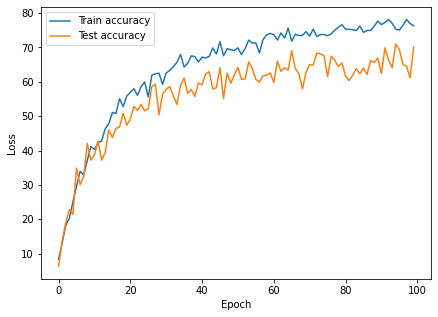

In [ ]:
 #Loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.002, weight_decay=1e-3) # 0.0018000000000000004

# Training for Simple_Net

num_epochs = 100
top_1_train = []
top_1_test = []
# loop over the dataset multiple times
total_step = len(train_loader)
for epoch in range(num_epochs):
  print('Epoch: {}'.format(epoch + 1))
  
  # train for 1 epoch on the train set
  correct = 0
  for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)

      labels = labels.to(device)
      
      # zero the parameter gradients
      optimizer.zero_grad()

      # forward 
      outputs = model(images)
      loss = criterion(outputs, labels)
      
      # backward
      loss.backward()

      # gradient step 
      optimizer.step()
      
      # compute accuracy 
      correct += accuracy(outputs, labels)[0].item() / 100
      if (i+1) % 5 == 0:
          print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

  top_1 = correct / len(train_loader) * 100
  top_1_train.append(top_1)
  print('Train Accuracy of the model: {} %'.format(top_1)) 

          
  # evaluate on the test set  
  with torch.no_grad():
      correct = 0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
      
        # forward 
        outputs = model(images)
        loss = criterion(outputs, labels)

        # compute accuracy 
        correct += accuracy(outputs, labels)[0].item() / 100
  
  top_1 = correct / len(test_loader) * 100
  top_1_test.append(top_1)
  print('Test Accuracy of the model: {} %'.format(top_1))

plt.figure(figsize=(7, 5))
plt.plot(top_1_train, label='Train accuracy')
plt.plot(top_1_test, label='Test accuracy')
plt.xlabel('Epoch')
# plt.xscale('log10')
plt.ylabel('Loss')
# plt.yscale("log")
plt.legend()
plt.show()
del model
model = Simple_ConvNet(num_classes = num_classes).to(device)

# Results

# Simple_convNet
archi: train:  71.70%    , test: 66,54%

hcp:  train: 76.3% , test:  70.10% 

brainomics: train: 5.62%  , test: 4.90% 

camcan: train: 62.71%  , test: 54.92% 

la5c: train: 63,46%       , test: 52.96% 

In [2]:
Accuracies_train = [71.70, 76.3, 5.62, 62.76, 63.46]
Accuracies_test = [ 66.54, 70.10, 4.90, 54.92, 52.96]
# Calculate the Standard deviation of the accuracy
liste_accuracy = [ Accuracies_train, Accuracies_test ]
names = ['train', 'test']
for name, lst in zip(names, liste_accuracy):
    print('Standard Deviation form '+ name)
    import statistics
    std = statistics.stdev(lst)
    print(std)

Standard Deviation form train
28.714406140472416
Standard Deviation form test
26.193951210155372


In [ ]:
del model

In [ ]:
#checck shape of each image
for image, label in train_loader:
  print(image.shape)
  break

torch.Size([32, 91, 109, 91])


In [ ]:
#Convolutional Neural Network + bidirectionnal LSTM
class ConvNet_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(ConvNet_LSTM, self).__init__()
      self.hidden_size = hidden_size
      self.num_layers = num_layers


      self.layer1 = nn.Sequential(
          nn.Conv2d(53, 110, kernel_size=5, stride=1, padding=2), #change the input channel from 91 to 53 when using Cam-CAN and Brainomics datasets
          nn.BatchNorm2d(110),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2), nn.Dropout(0.85))
      
      self.layer2 = nn.Sequential(
          nn.Conv2d(110, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2), nn.Dropout(0.8))
      
      self.layer3 = nn.Sequential(
          nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer4 = nn.Sequential(
          nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
  
      self.layer5 = nn.Sequential(
          nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))#, nn.Dropout(0.8))
      
      #Comment the following layer when using Cam-CAN and Brainomics datasets
      self.layer6 = nn.Sequential(
          nn.Conv2d(256, 256, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))


      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
      
      self.fc = nn.Linear(hidden_size*2, num_classes) 
        
    def forward(self, x):
      #uncomment the following line when using camcan and brainomics datasets
      out = self.layer1(x)
      out = self.layer2(out) 
      out = self.layer3(out)
      out = self.layer4(out)
      out = self.layer5(out)
      #comment the following line for camcan and brainomics datasets
      out = self.layer6(out)
      
      out =  out.reshape(-1, sequence_length, input_size)

      # Set initial states
      h0 = torch.zeros(self.num_layers*2, out.size(0), self.hidden_size).to(device) # 2 for bidirection 
      c0 = torch.zeros(self.num_layers*2, out.size(0), self.hidden_size).to(device)
  
      out, _ = self.lstm(out, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size*2)
      out = self.fc(out[:, -1, :])

      return out

In [ ]:
# ConvNet_LSTM model
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
input_size = 1
hidden_size= 20
num_layers = 2
sequence_length = 256
model = ConvNet_LSTM(input_size, hidden_size, num_layers, num_classes).to(device)

In [ ]:
model.share_memory()

ConvNet_LSTM(
  (layer1): Sequential(
    (0): Conv2d(91, 110, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.85, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(110, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.8, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(

Epoch: 1
Epoch [1/100], Step [5/26], Loss: 3.1378
Epoch [1/100], Step [10/26], Loss: 3.1298
Epoch [1/100], Step [15/26], Loss: 3.1493
Epoch [1/100], Step [20/26], Loss: 3.1384
Epoch [1/100], Step [25/26], Loss: 3.1405
Train accuracy: 4.36%
Test accuracy: 6.73%
Epoch: 2
Epoch [2/100], Step [5/26], Loss: 3.1227
Epoch [2/100], Step [10/26], Loss: 3.1265
Epoch [2/100], Step [15/26], Loss: 3.0939
Epoch [2/100], Step [20/26], Loss: 3.0780
Epoch [2/100], Step [25/26], Loss: 3.0530
Train accuracy: 8.27%
Test accuracy: 7.53%
Epoch: 3
Epoch [3/100], Step [5/26], Loss: 2.9102
Epoch [3/100], Step [10/26], Loss: 2.8624
Epoch [3/100], Step [15/26], Loss: 3.0062
Epoch [3/100], Step [20/26], Loss: 2.9232
Epoch [3/100], Step [25/26], Loss: 2.8585
Train accuracy: 7.79%
Test accuracy: 6.38%
Epoch: 4
Epoch [4/100], Step [5/26], Loss: 2.9716
Epoch [4/100], Step [10/26], Loss: 2.8195
Epoch [4/100], Step [15/26], Loss: 2.7323
Epoch [4/100], Step [20/26], Loss: 2.7256
Epoch [4/100], Step [25/26], Loss: 2.6355

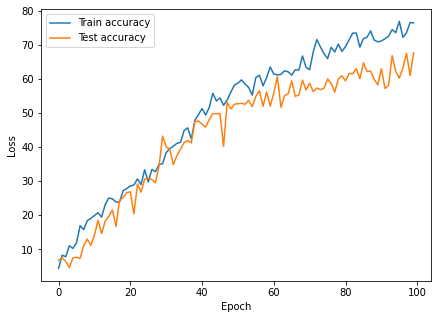

In [ ]:
#Loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.002, weight_decay=1e-3) # 0.0018000000000000004
# optimizer = torch.optim.SGD(net.parameters(), lr=0.003, momentum=0.9, weight_decay=1e-3)
# optimizer = torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

#Training for ConvNet_LSTM

num_epochs = 100
clip_value = 5

top_1_train = []
top_1_test = []
# loop over the dataset multiple times
total_step = len(train_loader)
for epoch in range(num_epochs):
    print('Epoch: {}'.format(epoch + 1))
    
    # train for 1 epoch on the train set
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        loss.backward()
        torch.nn.utils.clip_grad_value_(model.parameters(), clip_value )

        # gradient step 
        optimizer.step()
        
        # compute accuracy 
        correct += accuracy(outputs, labels)[0].item() / 100
        if (i+1) % 5 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    top_1 = correct / len(train_loader) * 100
    top_1_train.append(top_1)
    print('Train accuracy: {:.2f}%'.format(top_1))
            
    # evaluate on the test set  
    with torch.no_grad():
        correct = 0
        for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
        
          # forward 
          outputs = model(images)
          loss = criterion(outputs, labels)
  
          # compute accuracy 
          correct += accuracy(outputs, labels)[0].item() / 100
    
    top_1 = correct / len(test_loader) * 100
    top_1_test.append(top_1)
    print('Test accuracy: {:.2f}%'.format(top_1))
plt.figure(figsize=(7, 5))
plt.plot(top_1_train, label='Train accuracy')
plt.plot(top_1_test, label='Test accuracy')
plt.xlabel('Epoch')
# plt.xscale('log10')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Results

# ConvNet+LSTM
archi :  train: 68.45%  , test: 60.20%

hcp : train: 76.48%   , test:  67.67%

brainomics: train: 5.62 , test: 4.90

camcan: train: 70.75% , test: 52.25%

la5c: train:  75.83%    , test: 51.46%

In [1]:
Accuracies_train = [68.65, 76.48, 5.62, 70.75, 75.83]
Accuracies_test = [ 60.20, 67.67, 4.90, 52.25, 51.46]
# Calculate the Standard deviation of the accuracy
liste_accuracy = [ Accuracies_train, Accuracies_test ]
names = ['train', 'test']
for name, lst in zip(names, liste_accuracy):
    print('Standard Deviation form '+ name)
    import statistics
    std = statistics.stdev(lst)
    print(std)

Standard Deviation form train
30.28334079985232
Standard Deviation form test
24.601396911557686
